In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 01

In [94]:
data=pd.read_csv('disney_movies_total_gross.csv')
data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


# Question 02

In [95]:
data.sort_values(by=['inflation_adjusted_gross'],inplace=True,ascending=False)
data['release_date'] = pd.to_datetime(data['release_date'])
data['year']=pd.DatetimeIndex(data['release_date']).year
copy_data=data

data=data.head(10)
data

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,1967
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898,1994


# Question 03

Text(0.5, 1.0, 'Movie genre trend')

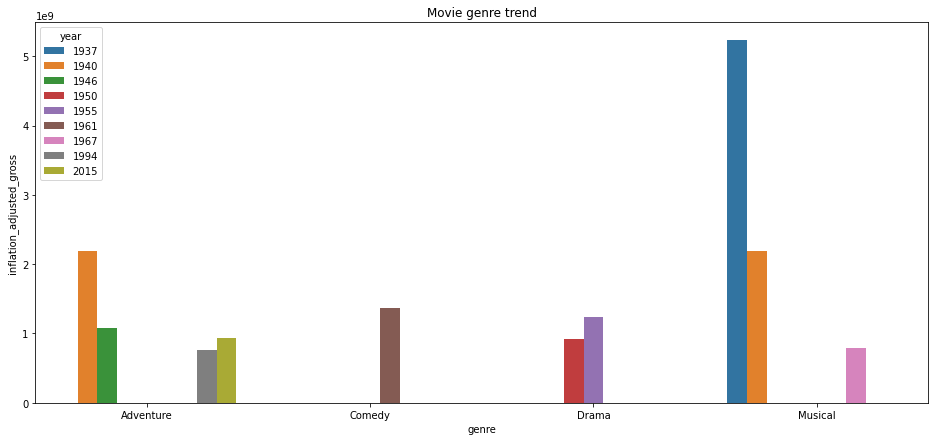

In [89]:
data_new=data.groupby(['genre','year','inflation_adjusted_gross']).size().reset_index()
plt.figure(figsize=(16, 7))
sns.barplot(x='genre', y="inflation_adjusted_gross", hue="year", data=data_new).set_title("Movie genre trend")

# Question 04

In [85]:
lis_genre=[]
lis_revenue=[]
for i,j in data_new.groupby(['genre']):
    lis_genre.append(i)
    lis_revenue.append(j['inflation_adjusted_gross'].mean())
dic={'genre':lis_genre,'gross':lis_revenue}
new_data=pd.DataFrame(dic)
fig=px.bar(new_data,x='genre',y='gross',color='genre')
fig.show()

# Question 05

## Total gross by each Genre

In [87]:
sum_all=[]
for i,j in data.groupby(['genre']):
    sum_all.append(j['total_gross'].sum())
dic={'genre':lis_genre,'total gross':sum_all}
new_data=pd.DataFrame(dic)

fig=px.bar(new_data,x='genre',y='total gross',color='genre')
fig.show()

## Which genre has highest total gross

In [88]:
data[data['total_gross']==data['total_gross'].max()]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015


## How movies trend increase by year

In [99]:

for i,j in copy_data.groupby(['genre','year']):

,genre,year,0
0,Action,1981,1
1,Action,1982,1
2,Action,1988,2
3,Action,1990,2
4,Action,1991,2
...,...,...,...
213,Western,1995,1
214,Western,2000,1
215,Western,2003,1
216,Western,2004,2
